In [1]:
from difflib import SequenceMatcher
import pandas as pd
import numbers
from matplotlib.pylab import *
import dtcwt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import operator
from Bio.Seq import Seq

In [2]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [3]:
similar("Apple","Appel")

0.8

In [4]:
similar("tail -f console_20160822_1838.log ","tail -f console_20160822_1844.log ")

0.9411764705882353

In [5]:
cmddf = pd.read_csv("D:\\workspace_jupyter\\lab_datacenter\\data\\history_company2.csv",encoding='iso-8859-1',header=None)
print(cmddf);

                                         0
0                                       ls
1             tail -f StatisticsHealth.log
2                       ps -ef | grep java
3                                 cd ../..
4                                       ls
5                                cd tomcat
6                                   cd bin
7                            ./startup.sh 
8                           ./shutdown.sh 
9                            ./startup.sh 
10                      ps -ef | grep java
11                         cd /nkia/BSBANK
12                                      ls
13                              cd manager
14                      cd deploy/service/
15                                      ls
16     cd com.nkia.service.statistics_1.0/
17                                      ls
18                                  ls -al
19                                cd ../..
20                                      ls
21                                   cd ..
22         

In [6]:
cmdlist = cmddf[0].tolist()
cmdlistStr = cmdlist[:]
print(cmdlist)

['ls', 'tail -f StatisticsHealth.log', 'ps -ef | grep java', 'cd ../..', 'ls', 'cd tomcat', 'cd bin', './startup.sh ', './shutdown.sh ', './startup.sh ', 'ps -ef | grep java', 'cd /nkia/BSBANK', 'ls', 'cd manager', 'cd deploy/service/', 'ls', 'cd com.nkia.service.statistics_1.0/', 'ls', 'ls -al', 'cd ../..', 'ls', 'cd ..', 'ls', 'cd bin', './manager.sh -stop', './manager.sh -shutdown', './manager.sh -start', './manager.sh -startup', 'ps -ef | grep java', './manager.sh -shutdown', 'ps -ef | grep java', 'cd ..', 'ls', 'cd ..', 'ls', 'cd tomcat', 'ls', 'cd bin', './shutdown.sh ', 'ps -ef | grep java', 'ls', 'cd ..', 'ls', 'cd ..', 'ls', 'cd manager/bin', './manager.sh -start', './manager.sh -startup', 'clear', './manager.sh -startup', 'ps -ef | grep java', './manager.sh -stop', './manager.sh -shutdown', 'ps -ef | grep java', './manager.sh -startup', 'ls', 'cd ../logs', 'ls', 'tail -f console_20160822_1838.log ', 'cd ../bin', './manager.sh -shutdown', './manager.sh -startup', 'cd ../logs',

In [7]:
subset_of_cmdlist = set(['ls','pwd','clear'])
cmdlist = [a.strip() for a in cmdlist if a.strip() not in subset_of_cmdlist]
print(cmdlist)


['tail -f StatisticsHealth.log', 'ps -ef | grep java', 'cd ../..', 'cd tomcat', 'cd bin', './startup.sh', './shutdown.sh', './startup.sh', 'ps -ef | grep java', 'cd /nkia/BSBANK', 'cd manager', 'cd deploy/service/', 'cd com.nkia.service.statistics_1.0/', 'ls -al', 'cd ../..', 'cd ..', 'cd bin', './manager.sh -stop', './manager.sh -shutdown', './manager.sh -start', './manager.sh -startup', 'ps -ef | grep java', './manager.sh -shutdown', 'ps -ef | grep java', 'cd ..', 'cd ..', 'cd tomcat', 'cd bin', './shutdown.sh', 'ps -ef | grep java', 'cd ..', 'cd ..', 'cd manager/bin', './manager.sh -start', './manager.sh -startup', './manager.sh -startup', 'ps -ef | grep java', './manager.sh -stop', './manager.sh -shutdown', 'ps -ef | grep java', './manager.sh -startup', 'cd ../logs', 'tail -f console_20160822_1838.log', 'cd ../bin', './manager.sh -shutdown', './manager.sh -startup', 'cd ../logs', 'tail -f console_20160822_1844.log', 'crontab -e', 'crontab -e', 'ps -ef | grep AGENT', 'cd /nkia/app/a

In [8]:
prefix = ['ls','ll','cd']
for i in range(len(prefix)) :
    cmdlist = [x for x in cmdlist if not x.startswith(prefix[i])]
    
print(cmdlist)

['tail -f StatisticsHealth.log', 'ps -ef | grep java', './startup.sh', './shutdown.sh', './startup.sh', 'ps -ef | grep java', './manager.sh -stop', './manager.sh -shutdown', './manager.sh -start', './manager.sh -startup', 'ps -ef | grep java', './manager.sh -shutdown', 'ps -ef | grep java', './shutdown.sh', 'ps -ef | grep java', './manager.sh -start', './manager.sh -startup', './manager.sh -startup', 'ps -ef | grep java', './manager.sh -stop', './manager.sh -shutdown', 'ps -ef | grep java', './manager.sh -startup', 'tail -f console_20160822_1838.log', './manager.sh -shutdown', './manager.sh -startup', 'tail -f console_20160822_1844.log', 'crontab -e', 'crontab -e', 'ps -ef | grep AGENT', './agentstart.sh', './agentstart.sh', 'ps -ef | grep AGENT', 'ps -ef | grep java', 'uname -a', 's', 'vi service.template.xml', 'vi log4j.properties', 'ps -ef| grpe sh', 'ps -ef| grep sh', 'ant deletelog', 'ps -ef | grep java', './startup.sh', 'tail f- ../logs/console_20161014_1701.log', 'tail -f ../log

In [9]:

cmddict = {}
print("total leng>",len(cmdlist))
for idx in range(len(cmdlist)):
    val = cmdlist[idx]
    if(isinstance(val,numbers.Number)):
        continue
    valcompare = val.strip().replace(" ","")
    for idx2 in range(len(cmdlist)):
        if(isinstance(cmdlist[idx2],numbers.Number)):
            continue
        targetvalue = cmdlist[idx2].strip().replace(" ","")
        svalue = similar(valcompare,targetvalue)
        if(svalue>0.8):
            if(val not in cmddict):
                print(val)
                cmddict[val] = idx2
                cmdlist[idx2] = idx2
                cmdlistStr[idx2] = val
            else :
                cmdlist[idx2] = cmddict[val]
                cmdlistStr[idx2] = val
                
print(cmdlist)
        

total leng> 6472
tail -f StatisticsHealth.log
ps -ef | grep java
./startup.sh
./shutdown.sh
./manager.sh -stop
tail -f console_20160822_1838.log
crontab -e
ps -ef | grep AGENT
./agentstart.sh
uname -a
s
vi service.template.xml
vi log4j.properties
ps -ef| grpe sh
ant deletelog
tail f- ../logs/console_20161014_1701.log
vi ./notification.log
l s-al
sl
vi SqlMapConfig.properties
pwdls -al
..
vi statistics.log
su - oracle
dcd /nkia/
tail -f ./statistics.log
tail -f ./statistics.log | .*AttributeNotSupported.*
:q!
l
tail -f ../logs/statistics.log | grep .*ERROR.*
tail -16000f ../logs/statistics.log
vi console_20161017_1350.log
./manager.sh -shutdown;./manager.sh -startup
d bin
find / -name excepted_stat*
tail -f statistics.log | grep "can not collect"
:q
vi ex_stat_20151231185909.txt
vi ex_stat_20151231192418.csv
vi ex_stat_20161017194035.csv
tail -f controller.log
tail -f s
ps -ef|grep Manager
./mkill.sh
mv notification.jar notification_20161017.jar
:Q!
CD ..
c d..
tail -100f notification.l

chown --help
chmod 644 METLIFE.DMP
vi import.log
tail -f ./import.log
vi /nkia/EMS2.0/north/station/web/ROOT/station/js/form.js
vi ./form.js
ssh 192.168
ssh 192.168.233.6
vi log4j.xml
tail -f db.log
vi application_calltree.nvf
./magentctl  -r on
find . -name "*.trc" -ctime +1 -exec rm -f {} \;
vi /var/log/cron
find . -name "*.trc" -ctime +3
time
vi /var/log/lastlog
vi /var/log/btmp
vi /var/log/messages
systemtime
currenttime
vi /etc/rc.nomni2
traceroute -h
man traceroute
traceroute -w 1 -q 5192.168.200.70
vi /nkia/app/VAgent/NNPAgent/agentstart.sh
tail -f ./wasagent.log
vi ./tomcat7/bin/catalina.sh
vi ./agent/
vi /etc/rc.ems1
rpm -Uvh http://repo.whatap.io/centos/5/noarch/whatap-repo-1.0-1.noarch.rpm
yum -y install whatap-agent
env PATH=$PATH whatap 6KXFPL4B9WCDPSDXMV1W
echo $JaVA_HOME
java
/usr/java/jdk1.7.0_79
export JAVA_HOME=/usr/java/jdk1.7.0_79
export ORACLE_SID=orcl
sudo -E whatap --install-plugin oracle
mv ./management_network.jar ./management_network.jar_161024
pstree -a
who
w

rm -rf ./manager/
rm -rf ./am
unzip ./HYCQ_NORTH.zip
vi ./resource_ko_KR.properties
java -classpath ./lib/snmp3.jar com.nkia.net.snmp.SnmpAgent
vi agent.sh
chmod 755 agent.sh
./agent.sh
rm -rf agent
cp ./agent ./agent.sh
vi ./agent.bat
rm -rf ./agent.sh/
unzip snmp\ \(2\).zip
¤º¤· /¤Ì¤¿
¤Ó
./threaddump.sh
chmod 755 -R ./ant
kill -9 18197
mkdir DCA
mv ./PolestarDCA_Agent/ ./AgentInstall.sh ./DCA
tail -100f *.log
ping 221.141.145.133
vi ../logs/network.log
tail -100f network.log
vi manager/patch/RELEASE
rm -rf ./bin ./classes/ ./conf/ ./lib/ ./patch/ ./src/ ./var/
rm -rf ./tomcat_6.0.44/
mkdir cygnus_eslim
wget ftp://root@192.168.232.183/nkia/app/cygnus_eslim/NNPAgent_SMS_Linux64_3.4_7.0.2.33.tar.gz
./AgentInstall.sh -magent auip=127.0.0.1 -addrc
vi SMSAgent/conf/SMSAgnet.conf
kill -9 13947 14264 27391
vi ./distribution_C
vi ./distribution_config.xml
vi /rc.ems2
vi /rc.lo
cat manager.sh
cat ManagerInfo.conf
LL
cat third-party.txt
vi ../config
cp -r logs logs_backup
free -m
ps -ef | grep 

kill -9 12438 20820
export
java -jar trapSyslogSender.jar
./AgentInstall.sh -magent auip=127.0.0.1 makey=MA_192.168.232.183_CYGNUS-ESLIM -addrc
cat report_pub.jnlp
tail -200f scouter-tomcat-20160908.log
vi tomcat.conf
vi cd logs
vi agent.properties
mv agent.properties agent1.properties
vi startup.
mv agent1.properties agent.properties
vi catalina.2016-09-09.log
mv tomcat.conf tomcat5.conf
vi ../wpmagent/tomcat5.conf
mv wpmagent.jar ../
cp wpmagent.jar tomcat5/
nststat -anp | grep 928
cp -r template tomcat5
rm -rf tempate
tail -100f catalina.2016-09-26.log
nestat -anp | grep 2722
vi wpmagent/tomcat5/wpmagent.conf
tail -100f host-manager.2016-09-26.log
kill -9 3086
netstat -anp | grep java
[0, 1, 2, 3, 2, 1, 6, 6, 6, 6, 1, 6, 1, 3, 1, 6, 6, 6, 1, 6, 6, 1, 6, 23, 6, 6, 23, 27, 27, 29, 30, 30, 29, 1, 34, 35, 36, 37, 38, 38, 40, 1, 2, 43, 43, 2, 46, 47, 48, 49, 50, 51, 52, 6, 6, 23, 0, 37, 0, 27, 29, 27, 29, 27, 64, 65, 66, 67, 67, 27, 29, 27, 29, 27, 74, 75, 66, 67, 37, 79, 79, 81, 66, 83,

In [38]:
cmdNumlist = cmddict.values()
print(cmdNumlist)

dict_values([4087, 791, 200, 3959, 5438, 5876, 344, 1204, 1873, 3100, 1706, 364, 4833, 1657, 6656, 266, 38, 419, 6087, 5795, 564, 3431, 2225, 1759, 3741, 639, 5062, 3127, 782, 1418, 4786, 1712, 5777, 6, 198, 712, 4827, 361, 6449, 1157, 1406, 682, 588, 5140, 3575, 291, 5450, 4903, 6638, 1618, 811, 4146, 1262, 352, 1922, 1727, 501, 2544, 5377, 1772, 2161, 4493, 2339, 3739, 489, 4712, 1149, 1632, 3053, 418, 2019, 751, 5340, 2268, 2486, 4806, 615, 1581, 3486, 770, 4701, 1555, 288, 553, 294, 1017, 17, 3416, 5738, 2783, 1994, 4823, 828, 474, 2720, 2909, 5873, 1003, 5635, 3102, 382, 5654, 816, 1449, 1930, 3994, 4770, 84, 2587, 1916, 666, 929, 353, 5051, 4252, 6246, 3574, 5063, 4754, 5137, 368, 202, 6633, 3765, 2388, 3942, 177, 507, 2689, 787, 6792, 2020, 67, 390, 195, 655, 1434, 4404, 3417, 1624, 2085, 5226, 1315, 1164, 3751, 1617, 3480, 2619, 4723, 2024, 1407, 392, 5250, 1180, 6267, 511, 4166, 671, 1476, 1910, 1155, 3130, 4818, 1760, 1400, 3990, 1316, 5875, 3035, 5337, 1311, 262, 610, 82, 12

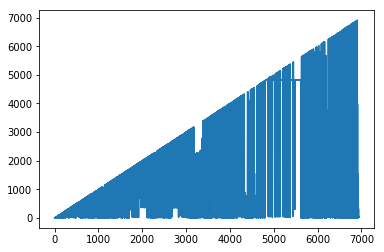

In [39]:
plt.plot(cmdlist)

In [40]:
cmdWindowResult = [cmdlistStr[i:i+3] for i in range(len(cmdlistStr)-2)]
resultMotif = {};
for i in range(len(cmdWindowResult)) :
    if(cmdWindowResult[i][0] == "completed") :
            continue
    for j in range(len(cmdWindowResult)) :
        if(i==j) :
            continue
        if(cmdWindowResult[j][0] == "completed") :
            continue
        if("".join(cmdWindowResult[i]) == "".join(cmdWindowResult[j])) :
            print(cmdWindowResult[j])
            newval = tuple(cmdWindowResult[j][:])
            if(newval not in resultMotif):
                resultMotif[newval] = 1
            else :
                resultMotif[newval] = resultMotif[newval] + 1
            cmdWindowResult[j][0] = "completed"
#resultMotif = list(map(labda x : similar ))


['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup.sh ']
['./startup.sh ', './shutdown.sh ', './startup

['./agentstart.sh', './agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentstart.sh', 'vi ./MAgent/conf/MasterAgent.conf', './agentstart.sh']
['./agentsta

['ps -ef|grep Agent', 'ps -ef | grep DCA', './agentstart.sh']
['clear', 'mkdir PolestarDCA_Agent', 'gzip -d PolestarDCA_Linux64_3.4_2.3.0-b1.tar.gz ']
['mkdir PolestarDCA_Agent', 'gzip -d PolestarDCA_Linux64_3.4_2.3.0-b1.tar.gz ', 'rm -rf AgentInstall.sh ']
['gzip -d PolestarDCA_Linux64_3.4_2.3.0-b1.tar.gz ', 'rm -rf AgentInstall.sh ', 'ps -ef | grep DCA']
['rm -rf AgentInstall.sh ', 'ps -ef | grep DCA', '/nkia']
['ps -ef | grep DCA', '/nkia', 'ps -ef | grep java']
['/nkia', 'ps -ef | grep java', 'ps -ef | grep AGENT']
['ps -ef | grep java', 'ps -ef | grep AGENT', './agentstart.sh']
['ps -ef | grep java', 'ps -ef | grep AGENT', './agentstart.sh']
['ps -ef |grep sleep', 'top', 'top']
['date', 'rdate -s time.bora.net', 'date']
['./startup.sh ', 'vi loggenerator.sh ', './stop.sh ']
['./startup.sh ', 'vi loggenerator.sh ', './stop.sh ']
['vi loggenerator.sh ', './stop.sh ', './startup.sh ']
['mv ./agent/DCA ./', 'vi ./PolestarDCA_Agent/agentstart.sh', 'vi /etc/rc.pdca1']
['mv ./agent/DCA .

['clear', 'crontab -e', 'clear']
['clear', 'crontab -e', 'clear']
['clear', 'crontab -e', 'clear']
['clear', 'crontab -e', 'clear']
['clear', 'crontab -e', 'clear']
['clear', 'crontab -e', 'clear']
['clear', 'crontab -e', 'clear']
['crontab -e', 'clear', 'ps -ef | grep java']
['crontab -e', 'clear', 'ps -ef | grep java']
['crontab -e', 'clear', 'ps -ef | grep java']
['crontab -e', 'clear', 'ps -ef | grep java']
['crontab -e', 'clear', 'ps -ef | grep java']
['crontab -e', 'clear', 'ps -ef | grep java']
['crontab -e', 'clear', 'ps -ef | grep java']
['crontab -e', 'clear', 'ps -ef | grep java']
['clear', 'ps -ef | grep java', 'su - oracle']
['clear', 'ps -ef | grep java', 'su - oracle']
['clear', 'ps -ef | grep java', 'su - oracle']
['clear', 'ps -ef | grep java', 'su - oracle']
['clear', 'ps -ef | grep java', 'su - oracle']
['clear', 'ps -ef | grep java', 'su - oracle']
['./agentstart.sh', 'ps -ef | grep AGENT', 'vi MAgent/log/20160502_MAGENT.log ']
['ps -ef | grep AGENT', 'vi MAgent/log

['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log ']
['ant deletelog', './startup

['./startup.sh ', 'tail -f ../logs/catalina.out', './shutdown.sh ']
['./startup.sh ', 'tail -f ../logs/catalina.out', './shutdown.sh ']
['./startup.sh ', 'tail -f ../logs/catalina.out', './shutdown.sh ']
['./startup.sh ', 'tail -f ../logs/catalina.out', './shutdown.sh ']
['df -h', 'ant deletelog', './startup.sh ']
['./startup.sh ', 'tail f- ../logs/console_20161014_1701.log ', 'ant deletelog']
['./startup.sh ', 'tail f- ../logs/console_20161014_1701.log ', 'ant deletelog']
['./startup.sh ', 'tail f- ../logs/console_20161014_1701.log ', 'ant deletelog']
['./startup.sh ', 'tail f- ../logs/console_20161014_1701.log ', 'ant deletelog']
['./startup.sh ', 'tail f- ../logs/console_20161014_1701.log ', 'ant deletelog']
['./startup.sh ', 'tail f- ../logs/console_20161014_1701.log ', 'ant deletelog']
['./startup.sh ', 'tail f- ../logs/console_20161014_1701.log ', 'ant deletelog']
['tail f- ../logs/console_20161014_1701.log ', 'ant deletelog', './startup.sh ']
['tail f- ../logs/console_20161014_1

['./apachectl start', './apachectl start', 'ps -ef|grep http']
['./apachectl start', './apachectl start', 'ps -ef|grep http']
['./apachectl start', 'ps -ef|grep http', './apachectl start']
['./apachectl start', 'ps -ef|grep http', './apachectl start']
['./apachectl start', 'ps -ef|grep http', './apachectl start']
['./apachectl start', 'ps -ef|grep http', './apachectl start']
['ps -ef|grep http', './apachectl start', 'ps -ef|grep http']
['ps -ef|grep http', './apachectl start', 'ps -ef|grep http']
['./apachectl start', 'ps -ef|grep http', 'vi httpd.conf ']
['ps -ef|grep http', 'vi httpd.conf ', './apachectl start']
['vi workers.properties', './apachectl start', './apachectl start']
['make distclena', 'make distclena', './configure']
['make distclena', './configure', 'make']
['./port-mirroring --debug', 'vi /etc/port-mirroring ', './port-mirroring --debug']
['./port-mirroring --debug', 'vi /etc/port-mirroring ', './port-mirroring --debug']
['make', './port-mirroring --debug', 'vi /etc/po

['du -sh ./', 'du -sh ./', 'clear']
['clear', './shutdown.sh ', 'ps -ef | grep tomcat']
['./shutdown.sh ', 'ps -ef | grep tomcat', 'clear']
['./shutdown.sh ', 'ps -ef | grep tomcat', 'clear']
['ps -ef | grep tomcat', 'clear', 'rm *']
['clear', 'rm *', 'clear']
['rm *', 'clear', 'clear']
['netstat -ano | grep 31003', 'df -h', 'clear']
['mkdir tomcat7_1', 'mkdir tomcat7_1', 'mkdir tomcat7_1']
['mkdir tomcat7_1', 'mkdir tomcat7_1', 'mkdir tomcat7_1']
['mkdir tomcat7_1', 'mkdir tomcat7_1', 'mkdir tomcat7_1']
['cp tomcat7 tomcat7_1', '\\cp -rf ./tomcat7/* ./tomcat7_1', '\\cp -rf ./tomcat7/* ./tomcat7_1']
['\\cp -rf ./tomcat7/* ./tomcat7_1', '\\cp -rf ./tomcat7/* ./tomcat7_1', 'top']
['vi server.log', 'vi server.log', 'vi server.log']
['vi ./catalina.sh ', './startup.sh ', 'vi ./catalina.sh ']
['./startup.sh ', 'vi ./catalina.sh ', './startup.sh ']
['./startup.sh ', 'vi ./catalina.sh ', './startup.sh ']
['vi ./catalina.sh ', './startup.sh ', './shutdown.sh ']
['ps -ef | grep tomcat', 'ps -ef

['ps -ef | grep java', 'll', 'll']
['ps -ef | grep java', 'll', 'll']
['du -sh ./', 'du -sh ./', 'du -sh ./']
['du -sh ./', 'du -sh ./', 'du -sh ./']
['du -sh ./', 'du -sh ./', 'du -sh ./']
['du -sh ./', 'du -sh ./', 'du -sh ./']
['du -sh ./', 'du -sh ./', 'du -sh ./']
['du -sh ./', 'du -sh ./', 'du -sh ./']
['du -sh ./', 'du -sh ./', 'du -sh ./']
['du -sh ./', 'du -sh ./', 'du -sh ./']
['du -sh ./', 'du -sh ./', 'du -sh ./']
['du -sh ./', 'du -sh ./', 'du -sh ./']
['du -sh ./', 'du -sh ./', 'rm -rf *']
['du -sh ./', 'rm -rf *', 'du -sh ./']
['rm -rf *', 'du -sh ./', 'du -sh ./']
['vi tomcat/conf/server.xml', './startup.sh ', 'tail -f ../logs/catalina.out']
['vi tomcat/conf/server.xml', './startup.sh ', 'tail -f ../logs/catalina.out']
['clear', 'mkdir /nkia/app/agent', 'su - oracle']
['cat <(crontab -l) <(echo "0 2 * * * rdate -s time.bora.net;") | crontab -', 'crontab -e', 'crontab -e']
['crontab -e', 'crontab -e', 'su - oracle']
['crontab -e', 'su - oracle', 'exit']
['date', 'tail -1

['ps -ef | grep java', 'vi /etc/resolv.conf ', 'ant deletelog']
['vi /etc/resolv.conf ', 'ant deletelog', './startup.sh ']
['vi ../conf/Catalina/localhost/oz60.xml ', 'vi ../conf/Catalina/localhost/oz60.xml ', 'vi tomcat/conf/server.xml']
['tail -f ../logs/catalina.out', './shutdown.sh ', './startup.sh ']
['./shutdown.sh ', './startup.sh ', 'vi ./catalina.sh ']
['./startup.sh ', 'tail -f ../logs/catalina.out', 'echo $LANG']
['ps -ef | grep java', './manager.sh -stop', './shutdown.sh ']
['vi /etc/rc.d/rc.local', 'ps -ef | grep oracle', 'vi /etc/hosts']
['./hosts_insert.sh ', './hosts_insert.sh ', './hosts_insert.sh ']
['./hosts_insert.sh ', './hosts_insert.sh ', './hosts_insert.sh ']
['./hosts_insert.sh ', './hosts_insert.sh ', './hosts_insert.sh ']
['./startup.sh ', 'tail -f ../logs/catalina.out', 'date']
['tail -f ../logs/catalina.out', 'date', 'tail -f ../logs/catalina.out']
['date', 'tail -f ../logs/catalina.out', './shutdown.sh ']
['./agentstart.sh', './agentstart.sh', 'ifconfig']


['echo "get NNPAgent_UNIX_SRC_u20160804.tar.gz" >> ftp_down.sh', 'echo "get NNPAgent_Config.tar.gz" >> ftp_down.sh', 'echo "cd BUILD_MAKE" >> ftp_down.sh']
['echo "get NNPAgent_UNIX_SRC_u20160804.tar.gz" >> ftp_down.sh', 'echo "get NNPAgent_Config.tar.gz" >> ftp_down.sh', 'echo "cd BUILD_MAKE" >> ftp_down.sh']
['echo "get NNPAgent_UNIX_SRC_u20160804.tar.gz" >> ftp_down.sh', 'echo "get NNPAgent_Config.tar.gz" >> ftp_down.sh', 'echo "cd BUILD_MAKE" >> ftp_down.sh']
['echo "get NNPAgent_UNIX_SRC_u20160804.tar.gz" >> ftp_down.sh', 'echo "get NNPAgent_Config.tar.gz" >> ftp_down.sh', 'echo "cd BUILD_MAKE" >> ftp_down.sh']
['echo "get NNPAgent_UNIX_SRC_u20160804.tar.gz" >> ftp_down.sh', 'echo "get NNPAgent_Config.tar.gz" >> ftp_down.sh', 'echo "cd BUILD_MAKE" >> ftp_down.sh']
['echo "get NNPAgent_UNIX_SRC_u20160804.tar.gz" >> ftp_down.sh', 'echo "get NNPAgent_Config.tar.gz" >> ftp_down.sh', 'echo "cd BUILD_MAKE" >> ftp_down.sh']
['echo "get NNPAgent_UNIX_SRC_u20160804.tar.gz" >> ftp_down.sh',

['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT']
['ps -ef | grep AGEN

['java -jar wasagent_1.2.5_2014-06-26.jar ', 'vi ./install_config.xml ', 'java -jar wasagent_1.2.5_2014-06-26.jar ']
['tail f- ../logs/console_20161014_1701.log ', './startup.sh ', './startup.sh ']
['./startup.sh ', 'tail -f ../logs/catalina.out', 'ps -ef | grep AGENT']
['./startup.sh ', 'tail -f ../logs/catalina.out', 'ps -ef | grep AGENT']
['./startup.sh ', 'tail -f ../logs/catalina.out', 'ps -ef | grep AGENT']
['vi ./notification.log ', 'vi ./notification.log ', 'vi ./notification.log ']
['ant deletelog', 'sqlplus / as sysdba', 'su - oracle']
['./startup.sh ', 'ps -ef | grep java', 'kill -9 8332 29690 29865']
['crontab -e', 'ps -ef | grep java', 'kill -9 6887 10341 ']
['ps -ef | grep java', 'kill -9 6887 10341 ', 'ps -ef | grep java']
['kill -9 6887 10341 ', 'ps -ef | grep java', 'halt']
['ant deletelog', 'echo $LANG', './startup.sh ']
['vi ../conf/log4j.xml ', 'tail -f adaptor.log ', 's']
['vi oz60.xml', 'vi report.xml', 'cat report.xml.bak ']
['vi report.xml', 'cat report.xml.bak 

['pwd', 'cd ..', 'ls']
['pwd', 'cd ..', 'ls']
['pwd', 'cd ..', 'ls']
['cd ..', 'ls', 'cd agent/']
['cd ..', 'ls', 'cd agent/']
['cd ..', 'ls', 'cd agent/']
['cd ..', 'ls', 'cd agent/']
['cd ..', 'ls', 'cd agent/']
['cd ..', 'ls', 'cd agent/']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd agent/', 'ls']
['ls', 'cd tomcat', 'ls']
['ls', 'cd tomcat', 'ls']
['l

['cd ..', 'ls', 'cd tomcat_6.0.44/']
['cd tomcat', 'ls', 'cd bin']
['cd tomcat', 'ls', 'cd bin']
['cd tomcat', 'ls', 'cd bin']
['cd tomcat', 'ls', 'cd bin']
['cd tomcat', 'ls', 'cd bin']
['ls', 'cd bin', 'vi ../conf/Catalina/localhost/ROOT.xml ']
['cd bin', 'vi ../conf/Catalina/localhost/ROOT.xml ', 'ls']
['vi ../conf/Catalina/localhost/ROOT.xml ', 'ls', './startup.sh ']
['vi ../conf/Catalina/localhost/ROOT.xml ', 'ls', './startup.sh ']
['ls', './startup.sh ', 'tail -f ../logs/catalina.out']
['ls', './startup.sh ', 'tail -f ../logs/catalina.out']
['ls', './startup.sh ', 'tail -f ../logs/catalina.out']
['ls', 'cd bin', './startup.sh ']
['ls', 'cd bin', './startup.sh ']
['cd bin', './startup.sh ', 'tail -f ../logs/catalina.out']
['cd bin', './startup.sh ', 'tail -f ../logs/catalina.out']
['./startup.sh ', 'tail -f ../logs/catalina.out', 'cd /nkia/']
['./startup.sh ', 'tail -f ../logs/catalina.out', 'cd /nkia/']
['./startup.sh ', 'tail -f ../logs/catalina.out', 'cd /nkia/']
['tail -f ../l

['cd /nkia', 'ls', 'cd app']
['cd /nkia', 'ls', 'cd app']
['cd /nkia', 'ls', 'cd app']
['cd app', 'ls', 'mv ./agent/DCA ./']
['cd app', 'ls', 'mv ./agent/DCA ./']
['cd app', 'ls', 'mv ./agent/DCA ./']
['ls', 'mv ./agent/DCA ./', 'ls']
['ls', 'mv ./agent/DCA ./', 'ls']
['ls', 'mv ./agent/DCA ./', 'ls']
['mv ./agent/DCA ./', 'ls', 'cd DCA']
['mv ./agent/DCA ./', 'ls', 'cd DCA']
['mv ./agent/DCA ./', 'ls', 'cd DCA']
['cd DCA', 'ls', 'vi ./PolestarDCA_Agent/agentstart.sh']
['cd DCA', 'ls', 'vi ./PolestarDCA_Agent/agentstart.sh']
['cd DCA', 'ls', 'vi ./PolestarDCA_Agent/agentstart.sh']
['ls', 'vi ./PolestarDCA_Agent/agentstart.sh', 'vi /etc/rc.pdca1']
['ls', 'vi ./PolestarDCA_Agent/agentstart.sh', 'vi /etc/rc.pdca1']
['ls', 'vi ./PolestarDCA_Agent/agentstart.sh', 'vi /etc/rc.pdca1']
['vi ./PolestarDCA_Agent/agentstart.sh', 'vi /etc/rc.pdca1', 'ls']
['vi ./PolestarDCA_Agent/agentstart.sh', 'vi /etc/rc.pdca1', 'ls']
['vi ./PolestarDCA_Agent/agentstart.sh', 'vi /etc/rc.pdca1', 'ls']
['vi /etc/

['cd /nkia/app/agent', './agentstart.sh', 'cd NNPAgent']
['./agentstart.sh', 'cd NNPAgent', 'ls']
['./agentstart.sh', 'cd NNPAgent', 'ls']
['./agentstart.sh', 'cd NNPAgent', 'ls']
['./agentstart.sh', 'cd NNPAgent', 'ls']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['cd NNPAgent', 'ls', './agentstart.sh']
['ps -ef | grep java', 'ps -ef | grep AGENT', 'vi /etc/rc.nomi1']
['ps -ef | grep AGENT', 'vi /etc/rc.nomi1', 'vi /nkia/app/VAgent/NNPAgent/agentstart.sh']
['ps -ef | grep AGENT', 'vi /etc/rc.nomi1', 'vi /nkia/app/VAgent/NNPAgent/agentstart.sh']
['cd VAgent/', 'ls', 'tar -zxvf ./NNPAgen

['ls', 'cd LGUplus', 'ls']
['ls', 'cd LGUplus', 'ls']
['cd LGUplus', 'ls', 'cd version/']
['cd LGUplus', 'ls', 'cd version/']
['ls', 'cd version/', 'ls']
['ls', 'cd version/', 'ls']
['ls', 'cd version/', 'ls']
['ls', 'cd version/', 'ls']
['ls', 'cd version/', 'ls']
['ls', 'cd version/', 'ls']
['ls', 'cd version/', 'ls']
['ls', 'cd version/', 'ls']
['ls', 'cd version/', 'ls']
['cd version/', 'ls', 'cd manager/']
['cd version/', 'ls', 'cd manager/']
['vi deploy/default/com.nkia.service.ibatis_1.0/SqlMapConfig.properties ', 'ls', 'vi conf/config.properties ']
['vi conf/config.properties ', 'ls', 'cd bin']
['ant deletelog', './startup.sh ', 'tail -f ../logs/console_20151016_0412.log ']
['cd ..', 'ls', 'vi station/conf/station.properties ']
['vi station/conf/station.properties ', 'ls', 'cd tomcat/']
['ls', 'cd tomcat/', 'ls']
['ls', 'cd tomcat/', 'ls']
['ls', 'cd tomcat/', 'ls']
['cd manager/bin', './manager.sh -shutdown', 'ant deletelog']
['cd manager/bin', './manager.sh -shutdown', 'ant d

['g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o', './test', 'vi test.cpp']
['g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o', './test', 'vi test.cpp']
['g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o', './test', 'vi test.cpp']
['g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o', './test', 'vi test.cpp']
['g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o', './test', 'vi test.cpp']
['g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o', './test', 'vi test.cpp']
['g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o', './test', 'vi test.cpp']
['./test', 'vi test.cpp', 'g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o']
['./test', 'vi test.cpp', 'g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o']
['./test', 'vi test.cpp', 'g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o']
['./test', 'vi test.cpp', 'g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o']
['./test', 'vi test.c

['ls', 'cd megacenter', 'ls']
['ls', 'cd megacenter', 'ls']
['ls', 'cd megacenter', 'ls']
['ls', 'cd manager', 'ls']
['ls', 'cd bin', './manager.sh -startup']
['cd bin', './manager.sh -startup', 'cd ../..']
['./manager.sh -startup', 'cd ../..', 'ls']
['s', 'cd ..', 'ls']
['ls', 'cd megacenter_s1', 'ls']
['cd megacenter_s1', 'ls', 'cd manager/bin']
['cd tomcat/', 'cd bin', './startup.sh']
['cd /nkia/', 'ls', 'cd megacenter']
['cd /nkia/', 'ls', 'cd megacenter']
['cd megacenter', 'ls', 'cd manager/bin']
['./shutdown.sh ', 'ls', 'ps -ef | grep java']
['ps -ef | grep AGENT', 'cd /nkia/app/', 'ls']
['./manager.sh -shutdown', 'ant backuplog', './manager.sh -startup']
['./manager.sh -shutdown', 'ant backuplog', './manager.sh -startup']
['tail -200f ../logs/cubrid.log ', './manager.sh -shutdown', 'ant deletelog']
['tail -200f ../logs/cubrid.log ', './manager.sh -shutdown', 'ant deletelog']
['tail -200f ../logs/cubrid.log ', './manager.sh -shutdown', 'ant deletelog']
['./manager.sh -shutdown', 

['./agentstop.sh ', 'clear', 'ls']
['./dcaagentctl -r on', './dcaagentctl -r off', 'cd /usr']
['./dcaagentctl -r off', 'cd /usr', 'cd nkia']
['cd ../logs', 'vi cubrid.log ', 'cd ../bin']
['./manager.sh -startup', 'tail -200f ../logs/cubrid.log ', './manager.sh -shutdown']
['./manager.sh -startup', 'tail -200f ../logs/cubrid.log ', './manager.sh -shutdown']
['cd manager', 'cd bin', './threaddump.sh']
['cd manager/', 'vi deploy', 'cd deploy/service/']
['vi deploy', 'cd deploy/service/', 'ls']
['cd deploy/service/', 'ls', 'vi com.nkia.service.management.dbms.oracle_1.0']
['ls', 'vi com.nkia.service.management.dbms.oracle_1.0', 'cd com.nkia.service.management.dbms.oracle_1.0']
['vi com.nkia.service.management.dbms.oracle_1.0', 'cd com.nkia.service.management.dbms.oracle_1.0', 'ls -la']
['cd com.nkia.service.management.dbms.oracle_1.0', 'ls -la', 'cd ../../']
['ls -la', 'cd ../../', 'ls']
['cd ../../', 'ls', 'cd ../bin']
['ls', 'cd ../bin', './manager.sh -shutdown']
['cd ../bin', './manager

['ls', 'cd .', 'cd ..']
['cd ..', 'ls', 'cd wpmagent/']
['cd ..', 'ls', 'cd wpmagent/']
['cd /nkia', 'ls', 'cd ems1510']
['cd /nkia', 'ls', 'cd ems1510']
['cd /nkia', 'ls', 'cd ems1510']
['ls', 'cd ems1510', 'ls']
['ls', 'cd ems1510', 'ls']
['ls', 'cd ems1510', 'ls']
['ls', 'cd ems1510', 'ls']
['ls', 'cd ems1510', 'ls']
['cd ems1510', 'ls', 'cd tomcat']
['cd ems1510', 'ls', 'cd wpmagent']
['ls', 'cd wpmagent', 'ls']
['ls', 'cd wpmagent', 'ls']
['ls', 'cd wpmagent', 'ls']
['ls', 'cd wpmagent', 'ls']
['ls', 'cd wpmagent', 'ls']
['cd ..', 'ls', 'cd wpmagent']
['cd bin', './shutdown.sh ', './startup.sh']
['cd wpmagent/', 'ls', 'vi agent.properties ']
['ls', 'vi tomcat5.conf ', 'ls']
['cd /nkia/', 'ls', 'cd ems1510']
['./shutdown.sh ', './startup.sh', 'ps -ef | grep java']
['./shutdown.sh ', './startup.sh', 'ps -ef | grep java']
['ls', 'cd tomcat5', 'ls']
['ls', 'cd tomcat5', 'ls']
['ls', 'vi WPMAgentInfo.conf ', 'ls']
['ls', 'vi wpmagent.conf', 'ls']
['vi wpmagent.conf', 'ls', 'cd ..']
['l

In [41]:
print(resultMotif)

{('g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o', 'g++ -c AgentLog.cpp test.cpp; g++ -o test AgentLog.o test.o', './test'): 1, ('clear', 'mv ./management_network.jar ./management_network.jar_161024', './manager.sh -stop'): 2, ('./startup.sh ', 'tail -f ../logs/catalina.out', 'ps -ef | grep java'): 3, ('ps -ef | grep AGENT', 'cat /etc/rc.nomni1', 'vi /nkia/app/VAgent/NNPAgent/agentstart.sh'): 3, ('ll', 'mv test.cpp 20160808', 'mv win10mb.txt 20160808'): 1, ('vi ../deploy/service/com.nkia.service.management.dbms.sybase_1.0/plugin.xml ', './manager.sh -stop', 'ant deletelog'): 2, ('ls', './agentstop.sh ', './agentstart.sh '): 2, ('exit', 'mv -f /home/AG_BUILD /home/AG_BUILD_b', 'rm -rf /home/AG_BUILD_b'): 1, ('/sbin/service iptables status', 'service iptables stop', 'iptables -L'): 1, ('./startup.sh ', 'tail f- ../logs/console_20161014_1701.log ', './manager.sh -stop'): 5, ('cat /etc/rc.nomni1', 'mv -f /home/AG_BUILD /home/AG_BUILD_b', 'rm -rf /home/AG_BUILD_b'): 1, ('vi /e

In [42]:
sorted_resultMotif = sorted(resultMotif.items(),key=operator.itemgetter(1),reverse=True)
print(sorted_resultMotif)

[(('ls', 'cd ..', 'ls'), 177), (('cd ..', 'ls', 'cd ..'), 74), (('ant deletelog', './startup.sh ', 'tail f- ../logs/console_20161014_1701.log '), 63), (('./startup.sh ', './shutdown.sh ', './startup.sh '), 61), (('./shutdown.sh ', './startup.sh ', './shutdown.sh '), 59), (('ps -ef | grep AGENT', 'ps -ef | grep AGENT', 'ps -ef | grep AGENT'), 53), (('ll', 'll', 'll'), 46), (('./manager.sh -stop', 'ant deletelog', './manager.sh -stop'), 41), (('echo "open 192.168.0.10" >> ftp_down.sh', 'echo "user buagent \\"buagent\\"" >> ftp_down.sh', 'echo "bi" >> ftp_down.sh'), 35), (('echo "ftp -vn << END" > ftp_down.sh', 'echo "open 192.168.0.10" >> ftp_down.sh', 'echo "user buagent \\"buagent\\"" >> ftp_down.sh'), 35), (('./manager.sh -shutdown', 'ant deletelog', './manager.sh -startup'), 35), (('ps -e -o pcpu -o vsz -o rss -o args | grep', 'ps -e -o pcpu -o vsz -o rss -o args | grep', 'ps -e -o pcpu -o vsz -o rss -o args | grep'), 32), (('ps -e -o pcpu -o vsz -o rss -o args | grep test', 'ps -e -